In [ ]:
from google.colab import files
uploaded=files.upload()

Saving returnsant.csv to returnsant (1).csv


In [ ]:
import io
import pandas as pd
import numpy as np
#returnsant=pd.read_csv(io.BytesIO(uploaded['returnsant.csv']))

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
returnsant.describe()

,Hedge Fund,Factor - Low Risk,Factor - Value vs Growth,Factor - Fixed Income Carry,Factor - Local Equity,Factor - Trend Following,Factor - Commodities,Factor - Equity,Factor - Foreign Exchange Carry,Factor - Small Cap,Factor - Emerging Markets,Factor - Foreign Currency,Factor - Local Inflation,Factor - Equity Short Volatility,Factor - Credit,Factor - Interest Rates,Factor - Crowding,Factor - Momentum,Factor - Quality
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.008426,0.005162,150.222145,0.000084,-0.000999,0.005613,-0.001761,0.006200,-0.000083,-0.002021,-0.002571,0.001120,0.002171,0.001245,0.000228,165.289979,0.002219,0.005333,0.006526
std,0.029623,0.028541,2569.592857,0.019464,0.021516,0.026661,0.020470,0.040760,0.020065,0.018025,0.020904,0.018551,0.022432,0.018643,0.027555,1725.936406,0.009019,0.032067,0.015723
min,-0.096051,-0.128207,-12739.631010,-0.075152,-0.081331,-0.072346,-0.060501,-0.149934,-0.063892,-0.090379,-0.125790,-0.038892,-0.085123,-0.052001,-0.170308,-0.028068,-0.052240,-0.127459,-0.040496
25%,-0.009950,-0.011406,-0.015540,-0.010146,-0.014698,-0.010551,-0.013445,-0.014444,-0.010376,-0.011469,-0.013991,-0.010622,-0.008966,-0.009227,-0.009373,-0.003997,-0.000932,-0.011822,-0.001276
50%,0.008800,0.004758,-0.000972,0.001565,-0.000484,0.003492,-0.001189,0.012433,0.001187,-0.001049,-0.000205,0.000475,0.000509,0.004018,0.003766,0.002805,0.001267,0.007850,0.007147
75%,0.028000,0.023451,0.011636,0.011342,0.012546,0.020816,0.011129,0.028201,0.013087,0.009227,0.010226,0.011589,0.012679,0.012631,0.017425,0.009257,0.007310,0.024615,0.014936
max,0.087900,0.076999,31963.201490,0.065239,0.056810,0.102276,0.058252,0.115115,0.071994,0.069783,0.037207,0.067272,0.081401,0.040368,0.057066,23213.711040,0.028112,0.124979,0.084840


In [ ]:
def create_window(values,time_steps=4):
    output=[]
    for i in range(len(values)-time_steps+1):
        output.append(values[i:(i+time_steps)])
    return np.stack(output)

In [ ]:
sc2=StandardScaler()
value = create_window(sc2.fit_transform(returnsant['Factor - Value vs Growth'].values.reshape(-1,1)))

In [ ]:
sc3=StandardScaler()
rates=create_window(sc3.fit_transform(returnsant['Factor - Interest Rates'].values.reshape(-1,1)))

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 880 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


[*********************100%***********************]  1 of 1 completed


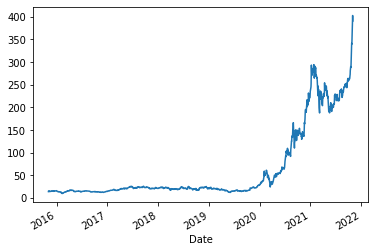

In [ ]:

import yfinance as yf
tsla=yf.download('TSLA','2015-11-3','2021-11-3')
tsla.Close.plot()

In [ ]:
tslapct=tsla.Close.pct_change()

In [ ]:
sc=StandardScaler()
tsla=create_window(sc.fit_transform(tslapct.dropna().values.reshape(-1,1)))

In [ ]:
value.shape

(192, 4, 1)

In [ ]:
rates.shape

(192, 4, 1)

In [ ]:
tsla.shape

(1507, 4, 1)

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
class AutoEncoder(keras.models.Model):
    def __init__(self,inputt):
        super().__init__()
        self.inputt=inputt
        self.conv=tf.keras.layers.Conv1D(32,7,padding='same',strides=2,input_shape=(self.inputt.shape[1],self.inputt.shape[2]), activation='relu')
        self.dropout=tf.keras.layers.Dropout(rate=0.2)
        self.conv2=tf.keras.layers.Conv1D(16,7,padding='same',strides=2,activation='relu')
        self.conv3=tf.keras.layers.Conv1DTranspose(16,7,padding='same',strides=2,activation='relu')
        self.conv4=tf.keras.layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        )
        self.conv5=tf.keras.layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same")
    def call(self,inputt):
        self.inputt=inputt
        x=self.conv(self.inputt)
        x=self.dropout(x)
        x=self.conv2(x)
        x=self.conv3(x)
        x=self.dropout(x)
        x=self.conv4(x)
        x=self.conv5(x)
     
        
        return x 

class anomalydetector(keras.models.Model):
    def __init__(self):
        super().__init__()
        self.dense1 = tf.keras.layers.Dense(32,activation="relu")
        self.dense2 = tf.keras.layers.Dense(16,activation="relu")
        self.dense3 = tf.keras.layers.Dense(8,activation="relu")
        self.dense4 = tf.keras.layers.Dense(16,activation="relu")
        self.dense5 = tf.keras.layers.Dense(32,activation="relu")
    
    def call(self,x):
        x=self.dense1(x)
        x=self.dense2(x)
        x=self.dense3(x)
        x=self.dense4(x)
        x=self.dense5(x)
        return x



In [ ]:
sc=StandardScaler()
ddata= create_window(sc.fit_transform(returnsant['Hedge Fund'].values.reshape(-1,1)))

In [ ]:
ddata.shape

(192, 4, 1)

In [ ]:
ddata.shape = (192,4,1)


In [ ]:
model2=AutoEncoder(ddata)

In [ ]:
modelval=AutoEncoder(value)

In [ ]:
modelrates=AutoEncoder(rates)

In [ ]:
model3=AutoEncoder(value)

In [ ]:
model4=anomalydetector()

In [ ]:
model5=anomalydetector()

In [ ]:
model6=anomalydetector()

In [ ]:
model7=AutoEncoder(tsla)

In [ ]:
model2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),loss="mse")

In [ ]:

model3.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),loss="mse")

In [ ]:
model4.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),loss="mse")

AttributeError: ignored

In [ ]:
model7.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),loss="mse")

In [ ]:
model5.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),loss="mse")

In [ ]:
modelval.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),loss="mse")

In [ ]:
modelrates.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),loss="mse")

In [ ]:
model6.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),loss="mse")

In [ ]:
history = model2.fit(
    ddata,
    ddata,
    epochs=100,
    batch_size=4,
    validation_split=0.3,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/100
34/34 [==============================] - 1s 10ms/step - loss: 0.5301 - val_loss: 0.9907
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2940 - val_loss: 0.6322
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 0.2435 - val_loss: 0.4080
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 0.1689 - val_loss: 0.3116
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2050 - val_loss: 0.3842
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 0.1508 - val_loss: 0.2674
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 0.1309 - val_loss: 0.2490
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 0.1287 - val_loss: 0.2969
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1475 - val_loss: 0.2065
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1315 - val_loss: 0.2305
Epoch 11

In [ ]:
historyval = modelval.fit(
    value,
    value,
    epochs=100,
    batch_size=4,
    validation_split=0.3,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/100
34/34 [==============================] - 2s 18ms/step - loss: 1.9451e-04 - val_loss: 3.3765
Epoch 2/100
34/34 [==============================] - 0s 7ms/step - loss: 9.0865e-07 - val_loss: 3.3754
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 3.8083e-08 - val_loss: 3.3756
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 1.2011e-09 - val_loss: 3.3755
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 1.6157e-10 - val_loss: 3.3755
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 9.5443e-11 - val_loss: 3.3755
Epoch 7/100
34/34 [==============================] - 0s 6ms/step - loss: 1.1025e-10 - val_loss: 3.3755


In [ ]:
historyrates = modelrates.fit(
    rates,
    rates,
    epochs=100,
    batch_size=4,
    validation_split=0.3,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/100
34/34 [==============================] - 1s 13ms/step - loss: 1.4625 - val_loss: 0.0172
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 1.3300 - val_loss: 0.0113
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 1.3387 - val_loss: 5.7186e-04
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 1.4224 - val_loss: 0.0011
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 1.2380 - val_loss: 0.0072
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 0.9195 - val_loss: 0.0017
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 0.9898 - val_loss: 0.0055
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 0.7966 - val_loss: 8.9800e-04


In [ ]:
history = model4.fit(
    sc2.fit_transform(returnsant['Factor - Value vs Growth'].values.reshape(-1,1)),
    sc2.fit_transform(returnsant['Factor - Value vs Growth'].values.reshape(-1,1)),
    epochs=100,
    batch_size=4,
    validation_split=0.3,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/100
34/34 [==============================] - 1s 6ms/step - loss: 0.0034 - val_loss: 3.2959
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 0.0034 - val_loss: 3.2962
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 0.0034 - val_loss: 3.2962
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 0.0034 - val_loss: 3.2962
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 0.0034 - val_loss: 3.2962
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 0.0034 - val_loss: 3.2962


In [ ]:
history = model5.fit(
    rates,
    rates,
    epochs=100,
    batch_size=4,
    validation_split=0.3,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/100
34/34 [==============================] - 1s 16ms/step - loss: 1.2309 - val_loss: 0.0092
Epoch 2/100
34/34 [==============================] - 0s 12ms/step - loss: 1.2420 - val_loss: 0.0092
Epoch 3/100
34/34 [==============================] - 0s 11ms/step - loss: 1.0816 - val_loss: 0.0092
Epoch 4/100
34/34 [==============================] - 0s 14ms/step - loss: 0.8930 - val_loss: 0.0092
Epoch 5/100
34/34 [==============================] - 0s 13ms/step - loss: 0.8250 - val_loss: 0.0092
Epoch 6/100
34/34 [==============================] - 0s 11ms/step - loss: 0.8154 - val_loss: 0.0092


In [ ]:
history6 = model6.fit(
    sc.fit_transform(tslapct.dropna().values.reshape(-1,1)),
    sc.fit_transform(tslapct.dropna().values.reshape(-1,1)),
    epochs=30,
    batch_size=20,
    validation_split=0.3,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/30
53/53 [==============================] - 0s 4ms/step - loss: 0.4772 - val_loss: 1.1595
Epoch 2/30
53/53 [==============================] - 0s 4ms/step - loss: 0.4772 - val_loss: 1.1595
Epoch 3/30
53/53 [==============================] - 0s 3ms/step - loss: 0.4772 - val_loss: 1.1595
Epoch 4/30
53/53 [==============================] - 0s 4ms/step - loss: 0.4772 - val_loss: 1.1603
Epoch 5/30
53/53 [==============================] - 0s 3ms/step - loss: 0.4773 - val_loss: 1.1601
Epoch 6/30
53/53 [==============================] - 0s 3ms/step - loss: 0.4774 - val_loss: 1.1599
Epoch 7/30
53/53 [==============================] - 0s 4ms/step - loss: 0.4777 - val_loss: 1.1624


In [ ]:
history7 = model7.fit(
    tsla,
    tsla,
    epochs=100,
    batch_size=20,
    validation_split=0.3,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/100
53/53 [==============================] - 1s 8ms/step - loss: 0.2869 - val_loss: 0.1966
Epoch 2/100
53/53 [==============================] - 0s 4ms/step - loss: 0.1189 - val_loss: 0.1710
Epoch 3/100
53/53 [==============================] - 0s 4ms/step - loss: 0.1189 - val_loss: 0.1347
Epoch 4/100
53/53 [==============================] - 0s 4ms/step - loss: 0.0999 - val_loss: 0.1241
Epoch 5/100
53/53 [==============================] - 0s 4ms/step - loss: 0.0887 - val_loss: 0.1723
Epoch 6/100
53/53 [==============================] - 0s 4ms/step - loss: 0.0946 - val_loss: 0.1343
Epoch 7/100
53/53 [==============================] - 0s 4ms/step - loss: 0.0879 - val_loss: 0.1143
Epoch 8/100
53/53 [==============================] - 0s 5ms/step - loss: 0.0949 - val_loss: 0.1079
Epoch 9/100
53/53 [==============================] - 0s 4ms/step - loss: 0.0825 - val_loss: 0.1580
Epoch 10/100
53/53 [==============================] - 0s 4ms/step - loss: 0.0873 - val_loss: 0.1136
Epoch 11/

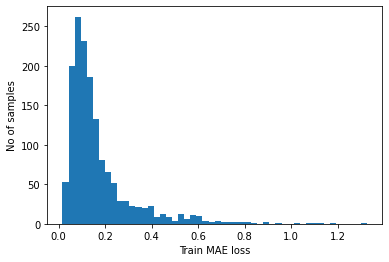

Reconstruction error threshold:  1.3255833712050273


In [ ]:
import matplotlib.pyplot as plt
x_train_pred7 = model7.predict(tsla)
train_mae_loss7 = np.mean(np.abs(x_train_pred7 -tsla), axis=1)

plt.hist(train_mae_loss7, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold7 = np.max(train_mae_loss7)
print("Reconstruction error threshold: ", threshold7)

In [ ]:
anomalies7 = train_mae_loss7 > 0.6
cnnind=np.where(anomalies7)
colorcnn=np.zeros(1510)
colorcnn[[cnnind]]=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  after removing the cwd from sys.path.


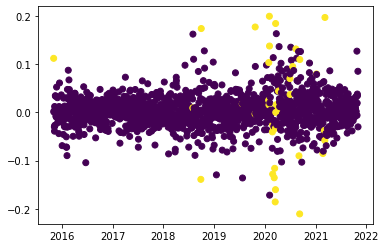

In [ ]:
plt.scatter(tslapct.dropna().index,tslapct.dropna().values,c=colorcnn)


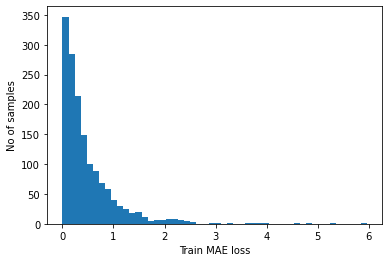

Reconstruction error threshold:  5.959307508467968


In [ ]:
import matplotlib.pyplot as plt
x_train_pred8 = model6.predict(sc.fit_transform(tslapct.dropna().values.reshape(-1,1)))
train_mae_loss8 = np.mean(np.abs(x_train_pred8 -sc.fit_transform(tslapct.dropna().values.reshape(-1,1))), axis=1)

plt.hist(train_mae_loss8, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold8 = np.max(train_mae_loss8)
print("Reconstruction error threshold: ", threshold8)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  after removing the cwd from sys.path.


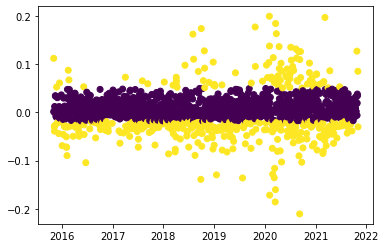

In [ ]:
anomalies8 = train_mae_loss8 > 0.6
cind=np.where(anomalies8)
colorcc=np.zeros(1510)
colorcc[[cind]]=1
plt.scatter(tslapct.dropna().index,tslapct.dropna().values,c=colorcc)

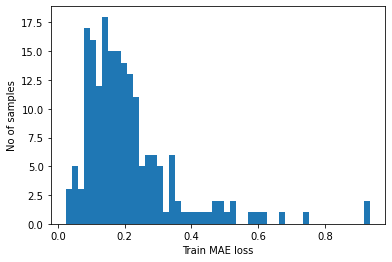

Reconstruction error threshold:  0.936139621252188


In [ ]:
import matplotlib.pyplot as plt
x_train_pred = model2.predict(ddata)
train_mae_loss = np.mean(np.abs(x_train_pred -ddata), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

In [ ]:
anomalies = train_mae_loss > 0.4
print("Indices of anomaly samples: ", np.where(anomalies))

Indices of anomaly samples:  (array([112, 139, 147, 161, 162, 175, 176, 177, 178, 179, 180, 182, 185,
       187, 188, 189, 191]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))


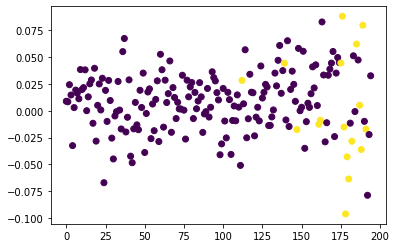

In [ ]:
hedge=returnsant['Hedge Fund']
indiceshedge=np.where(anomalies)[0]
indiceshedge
colorhedge=np.zeros(195)
colorhedge[indiceshedge]=1
plt.scatter(hedge.index,hedge.values, c=colorhedge)

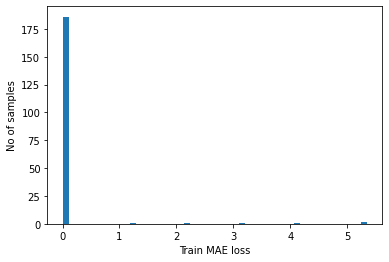

Reconstruction error threshold:  5.345485321504629


In [ ]:
import matplotlib.pyplot as plt
x_train_pred = modelval.predict(value)
train_mae_loss = np.mean(np.abs(x_train_pred -value), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

In [ ]:
anomaliese = train_mae_loss > 0.9
print("Indices of anomaly samples: ", np.where(anomaliese))

Indices of anomaly samples:  (array([176, 177, 178, 179, 180, 181]), array([0, 0, 0, 0, 0, 0]))


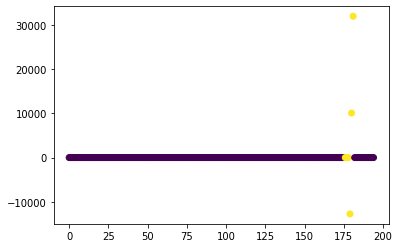

In [ ]:
vall=returnsant['Factor - Value vs Growth']
indicesval=np.where(anomaliese)[0]

colorval=np.zeros(195)
colorval[indicesval]=1
plt.scatter(vall.index,vall.values, c=colorval)

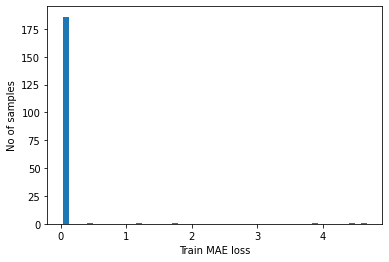

Reconstruction error threshold:  4.671055942870071


In [ ]:
import matplotlib.pyplot as plt
x_train_pred = modelrates.predict(rates)
train_mae_loss = np.mean(np.abs(x_train_pred -rates), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

In [ ]:
anomaliesee = train_mae_loss > 0.4
print("Indices of anomaly samples: ", np.where(anomaliesee))

Indices of anomaly samples:  (array([21, 22, 23, 24, 25, 26]), array([0, 0, 0, 0, 0, 0]))


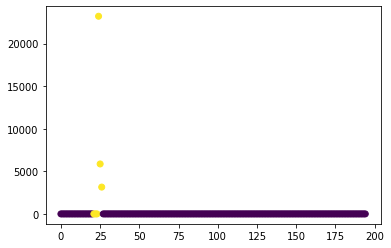

In [ ]:
ratess=returnsant['Factor - Interest Rates']
indicesrates=np.where(anomaliesee)[0]
colorrates=np.zeros(195)
colorrates[indicesrates]=1
plt.scatter(ratess.index,ratess.values, c=colorrates)

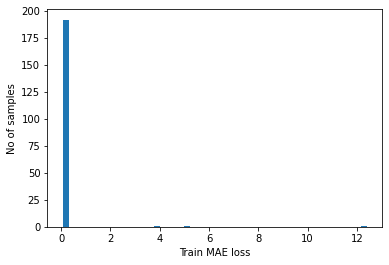

Reconstruction error threshold:  1.152793973902533


In [ ]:
import matplotlib.pyplot as plt
x_train_pred = model4.predict(sc2.fit_transform(returnsant['Factor - Value vs Growth'].values.reshape(-1,1)))
train_mae_loss = np.mean(np.abs(x_train_pred -sc2.fit_transform(returnsant['Factor - Value vs Growth'].values.reshape(-1,1)) ),axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.mean(train_mae_loss) + np.std(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

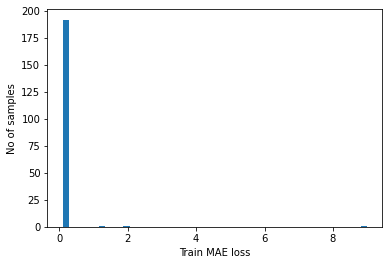

Reconstruction error threshold:  0.8082697651451852


In [ ]:
import matplotlib.pyplot as plt
x_train_pred = model5.predict(rates)
train_mae_loss = np.mean(np.abs(x_train_pred -rates ),axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.mean(train_mae_loss) + np.std(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

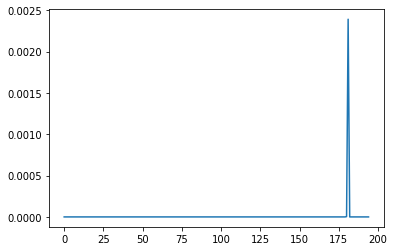

In [ ]:
plt.plot(np.mean(x_train_pred,axis=1))
#plt.plot(returnsant['Factor - Value vs Growth'].values.reshape(-1,1))

In [ ]:
import matplotlib.pyplot as plt
x_train_pred = model4.predict(sc.fit_transform(returnsant['Hedge Fund'].values.reshape(-1,1)))
train_mae_loss = np.mean(np.abs(x_train_pred -sc.fit_transform(returnsant['Hedge Fund'].values.reshape(-1,1)) ), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

In [ ]:
x_train_pred.shape

(192, 4, 1)

In [ ]:
pred=x_train_pred

In [ ]:
anomalies = train_mae_loss > 0.8
print("Indices of anomaly samples: ", np.where(anomalies))

Indices of anomaly samples:  (array([24, 25, 26]),)


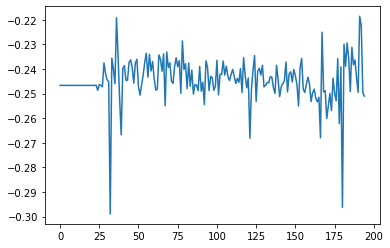

In [ ]:
plt.plot(((returnsant['Factor - Crowding']-np.mean(returnsant['Factor - Crowding'])/(np.std(returnsant['Factor - Crowding'])))))


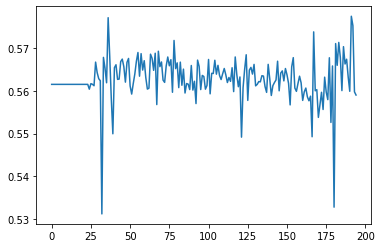

In [ ]:
plt.plot(np.log((returnsant['Factor - Crowding']+2-np.mean(returnsant['Factor - Crowding'])/(np.std(returnsant['Factor - Crowding'])))))

In [ ]:
from sklearn.mixture import GaussianMixture

# fit model
model = GaussianMixture(n_components=2, init_params='random')
model.fit(returnsant['Factor - Crowding'].values.reshape(-1,1))
# predict latent values
yhat = model.predict(returnsant['Factor - Crowding'].values.reshape(-1,1))

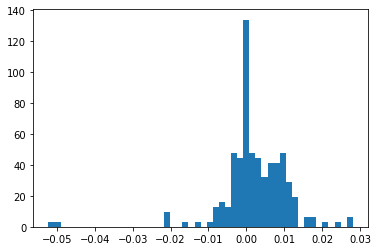

In [ ]:
plt.hist(returnsant['Factor - Crowding'].values, bins=50, density=True)
plt.show()

In [ ]:
print(yhat)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 0 0]


In [ ]:
!pip install --upgrade git+https://github.com/Danyleb/Lstm-Variational-Auto-encoder.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/Danyleb/Lstm-Variational-Auto-encoder.git to /tmp/pip-req-build-mg7gsye4
  Running command git clone -q https://github.com/Danyleb/Lstm-Variational-Auto-encoder.git /tmp/pip-req-build-mg7gsye4
  Created wheel for Lstm-variationnal-Auto-encoder: filename=Lstm_variationnal_Auto_encoder-1.1.0-py3-none-any.whl size=6535 sha256=df0b6144c6418ed73f6894b879c12a28e296a111eb78d985336817638601de1a
  Stored in directory: /tmp/pip-ephem-wheel-cache-ju09mw3o/wheels/ee/b0/52/306a3ef1019ae7c518f8f7aa7d3ea90e2a559bf9a0391284a6
Successfully built Lstm-variationnal-Auto-encoder


In [ ]:
import keras
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Input, LSTM, RepeatVector,TimeDistributed
from keras.layers.core import Flatten, Dense, Dropout, Lambda
latent_dim = 1
inter_dim = 32
timesteps, features = 4, 1

def sampling(args):
    z_mean, z_log_sigma = args
    batch_size = tf.shape(z_mean)[0] # <================
    epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0., stddev=1.)
    return z_mean + z_log_sigma * epsilon


input_x = Input(shape= (timesteps, features)) 

h = LSTM(inter_dim, activation='relu')(input_x)


z_mean = Dense(latent_dim)(h)
z_log_sigma = Dense(latent_dim)(h)
z = Lambda(sampling)([z_mean, z_log_sigma])

# Reconstruction decoder
decoder1 = RepeatVector(timesteps)(z)
decoder1 = LSTM(inter_dim, activation='relu', return_sequences=True)(decoder1)
decoder1 = TimeDistributed(Dense(features))(decoder1)

def vae_loss2(input_x, decoder1, z_log_sigma, z_mean):
    """ Calculate loss = reconstruction loss + KL loss for each data in minibatch """
    # E[log P(X|z)]
    recon = K.sum(K.binary_crossentropy(input_x, decoder1))
    # D_KL(Q(z|X) || P(z|X)); calculate in closed form as both dist. are Gaussian
    kl = 0.5 * K.sum(K.exp(z_log_sigma) + K.square(z_mean) - 1. - z_log_sigma)

    return recon + kl

m = Model(input_x, decoder1)
m.add_loss(vae_loss2(input_x, decoder1, z_log_sigma, z_mean)) #<===========
m.compile(loss=None, optimizer='adam')

In [ ]:
 sc2=StandardScaler()
val= returnsant['Factor - Value vs Growth']
val= sc2.fit_transform(val.values.reshape(-1,1))
val=create_window(val)
m.fit(val.reshape(192,4))

6/6 [==============================] - 1s 5ms/step - loss: 1.8503


In [ ]:
m.fit(ddata)

6/6 [==============================] - 2s 6ms/step - loss: 5.3060


In [ ]:
resval=m.predict(val)

In [ ]:
resval3=m.predict(ddata)

In [ ]:
m.fit(rates)
resval4=m.predict(rates)

6/6 [==============================] - 2s 5ms/step - loss: 3.0528


In [ ]:
m.fit(tsla)
tslares=m.predict(tsla)

48/48 [==============================] - 6s 6ms/step - loss: -141.6075


(array([536., 610., 207.,  89.,  37.,  11.,  11.,   3.,   0.,   3.]),
 array([0.05571635, 0.44614721, 0.83657808, 1.22700894, 1.6174398 ,
        2.00787066, 2.39830153, 2.78873239, 3.17916325, 3.56959411,
        3.96002498]),
 <a list of 10 Patch objects>)

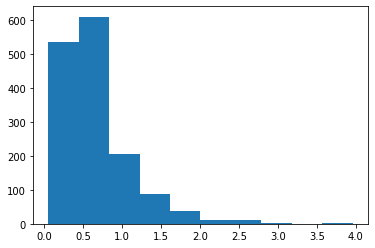

In [ ]:
import matplotlib.pyplot as plt
errort=np.mean(np.abs(tslares-tsla),axis=1)
plt.hist(errort)

In [ ]:
thresholdt = np.mean(errort) + np.std(errort)
print("Reconstruction error threshold: ", thresholdt)

Reconstruction error threshold:  1.1239951900544447


In [ ]:
indicesvae=np.where(errort > 1.12)
colorvaet=np.zeros(1510)
colorvaet[[indicesvae]]=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until


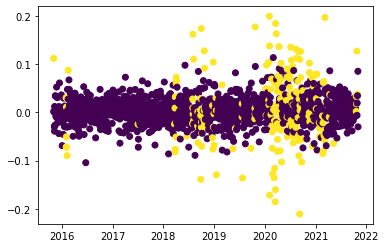

In [ ]:
plt.scatter(tslapct.dropna().index,tslapct.dropna().values,c=colorvaet)

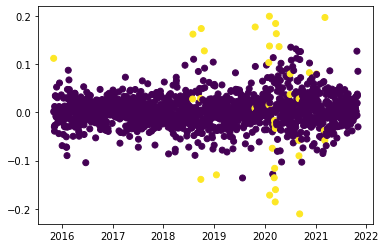

In [ ]:
plt.scatter(tslapct.dropna().index,tslapct.dropna().values,c=colorcnn)

(array([186.,   0.,   1.,   0.,   1.,   1.,   0.,   1.,   0.,   2.]),
 array([0.04948069, 0.57891486, 1.10834904, 1.63778321, 2.16721738,
        2.69665156, 3.22608573, 3.7555199 , 4.28495408, 4.81438825,
        5.34382242]),
 <a list of 10 Patch objects>)

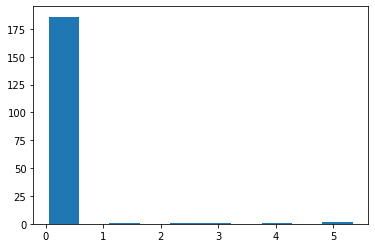

In [ ]:
import matplotlib.pyplot as plt
error=np.mean(np.abs(resval-val),axis=1)
plt.hist(error)

(array([15., 54., 46., 29., 24., 14.,  4.,  2.,  0.,  4.]),
 array([0.19016301, 0.38971313, 0.58926325, 0.78881337, 0.98836349,
        1.18791361, 1.38746373, 1.58701385, 1.78656397, 1.98611409,
        2.18566421]),
 <a list of 10 Patch objects>)

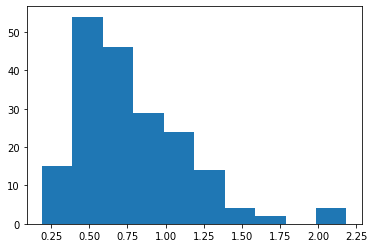

In [ ]:
import matplotlib.pyplot as plt
error2=np.mean(np.abs(resval3-ddata),axis=1)
plt.hist(error2)

(array([187.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   3.]),
 array([0.09574223, 0.5499118 , 1.00408137, 1.45825094, 1.91242051,
        2.36659008, 2.82075965, 3.27492922, 3.72909879, 4.18326836,
        4.63743793]),
 <a list of 10 Patch objects>)

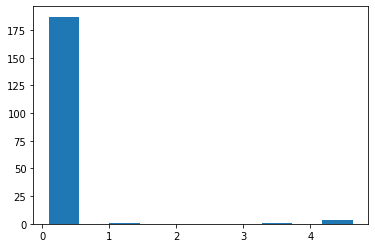

In [ ]:
import matplotlib.pyplot as plt
error3=np.mean(np.abs(resval4-rates),axis=1)
plt.hist(error3)

In [ ]:
threshold = np.mean(error) + np.std(error)
print("Reconstruction error threshold: ", threshold)

Reconstruction error threshold:  0.8308932069974877


In [ ]:
anomalies = error > 0.8
print("Indices of anomaly samples: ", np.where(anomalies))

Indices of anomaly samples:  (array([176, 177, 178, 179, 180, 181]), array([0, 0, 0, 0, 0, 0]))


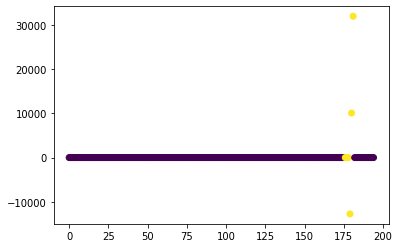

In [ ]:

vall=returnsant['Factor - Value vs Growth']
indicesval2=[176, 177, 178, 179, 180, 181]

colorval2=np.zeros(195)
colorval2[indicesval2]=1
plt.scatter(vall.index,vall.values, c=colorval2)

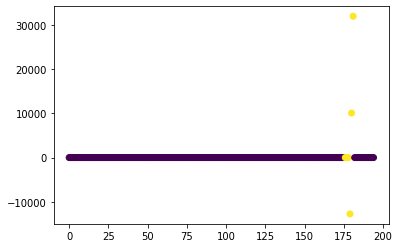

In [ ]:

plt.scatter(vall.index,vall.values, c=colorval)

In [ ]:
threshold2 = np.mean(error2) + np.std(error2)
print("Reconstruction error threshold: ", threshold)

Reconstruction error threshold:  0.927327545160614


In [ ]:
anomalies2 = error2 > 1.5
print("Indices of anomaly samples: ", np.where(anomalies2))

Indices of anomaly samples:  (array([173, 175, 176, 177, 178, 179, 189]), array([0, 0, 0, 0, 0, 0, 0]))


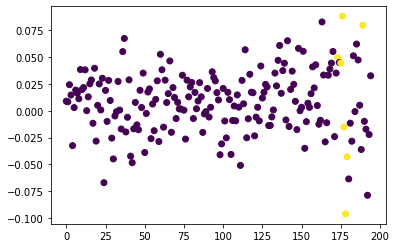

In [ ]:


indiceshedge2=[173, 175, 176, 177, 178, 179, 189]
colorhedge2=np.zeros(195)
colorhedge2[indiceshedge2]=1
plt.scatter(hedge.index,hedge.values, c=colorhedge2)

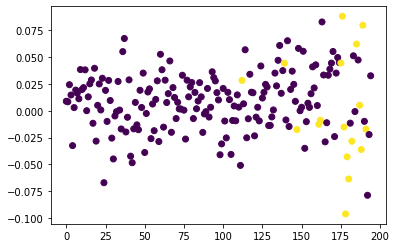

In [ ]:
plt.scatter(hedge.index,hedge.values, c=colorhedge)

In [ ]:
threshold3 = np.mean(error3) + np.std(error3)
print("Reconstruction error threshold: ", threshold3)

Reconstruction error threshold:  0.7910477842788082


In [ ]:
anomalies3 = error3 > 1.5
print("Indices of anomaly samples: ", np.where(anomalies3))

Indices of anomaly samples:  (array([21, 22, 23, 24]), array([0, 0, 0, 0]))


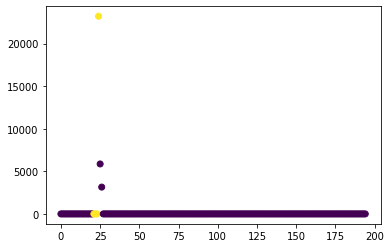

In [ ]:

indicesrates2=[21, 22, 23, 24]

colorrates2=np.zeros(195)
colorrates2[indicesrates2]=1
plt.scatter(ratess.index,ratess.values, c=colorrates2)

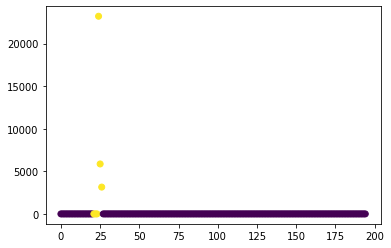

In [ ]:
plt.scatter(ratess.index,ratess.values, c=colorrates)

In [ ]:
!pip install copulas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from copulas.multivariate import GaussianMultivariate

from copulas.univariate import BetaUnivariate, GaussianKDE, GaussianUnivariate
from copulas.univariate import ParametricType, Univariate

univariate = Univariate(parametric=ParametricType.PARAMETRIC)

dist = GaussianMultivariate(distribution=univariate)
dist.fit(returnsant['Factor - Crowding'].values)

/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:5320: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


In [ ]:
skrt=dist.to_dict()

In [ ]:
skrt

{'columns': [0],
 'covariance': [[1.0]],
 'type': 'copulas.multivariate.gaussian.GaussianMultivariate',
 'univariates': [{'a': -8.434779542691835,
   'b': 4.010371190494562,
   'loc': 0.002219236223589744,
   'scale': 0.006456537501334546,
   'type': 'copulas.univariate.truncated_gaussian.TruncatedGaussian'}]}

In [ ]:
returnsant['Factor - Crowding'].iloc[0:24]=np.isnan

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
interp=returnsant['Factor - Crowding'].interpolate(method='spline')

In [ ]:
interp.values

array([<ufunc 'isnan'>, <ufunc 'isnan'>, <ufunc 'isnan'>, <ufunc 'isnan'>,
       <ufunc 'isnan'>, <ufunc 'isnan'>, <ufunc 'isnan'>, <ufunc 'isnan'>,
       <ufunc 'isnan'>, <ufunc 'isnan'>, <ufunc 'isnan'>, <ufunc 'isnan'>,
       <ufunc 'isnan'>, <ufunc 'isnan'>, <ufunc 'isnan'>, <ufunc 'isnan'>,
       <ufunc 'isnan'>, <ufunc 'isnan'>, <ufunc 'isnan'>, <ufunc 'isnan'>,
       <ufunc 'isnan'>, <ufunc 'isnan'>, <ufunc 'isnan'>, <ufunc 'isnan'>,
       -0.001965682, 0.00029188, 2.64911e-05, -0.000553583, 0.009135017,
       0.004828035, 0.002321179, 0.00149433, -0.052240115, 0.011084472,
       0.00661459, 0.000656651, 0.02750984, 0.011642236, -0.00577812,
       -0.020111385, 0.006848019, 0.008048794, 0.002037666, 0.002161982,
       0.009352986, 0.010373429, 0.007257802, 0.000913154, 0.009029015,
       0.010642858, -0.000617213, -0.003969337, 0.000322336, 0.004246882,
       0.009463971, 0.01309778, 0.003347571, 0.012624543, 0.00586107,
       0.009721134, 0.002788872, -0.001936377,

In [ ]:
!pip install pykalman

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 228 kB 4.9 MB/s 
  Created wheel for pykalman: filename=pykalman-0.9.5-py3-none-any.whl size=48462 sha256=6e56b404643b600aff94ae322e2c29a1b449ad28a6dc646559138d2f8386d4ce
  Stored in directory: /root/.cache/pip/wheels/6a/04/02/2dda6ea59c66d9e685affc8af3a31ad3a5d87b7311689efce6
Successfully built pykalman


In [ ]:
from pykalman import KalmanFilter 

In [ ]:
kf = KalmanFilter(transition_matrices = [[1, 1], [0, 1]], observation_matrices = [[0.1, 0.5], [-0.3, 0.0]])
 # 3 observations
one=np.ones((195,1))
measurements=np.concatenate((returnsant['Factor - Value vs Growth'].values.reshape(-1,1),one),axis=1)
f = kf.em(measurements)
(filtered_state_means, filtered_state_covariances) = kf.filter(measurements)
(smoothed_state_means, smoothed_state_covariances) = kf.smooth(measurements)

In [ ]:
returnsant['Factor - Value vs Growth'].values.reshape(-1,1).shape

(195, 1)

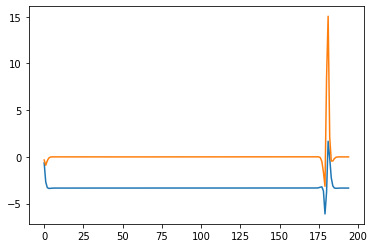

In [ ]:
plt.plot(smoothed_state_means)
#plt.plot(returnsant['Factor - Value vs Growth'].values.reshape(-1,1))

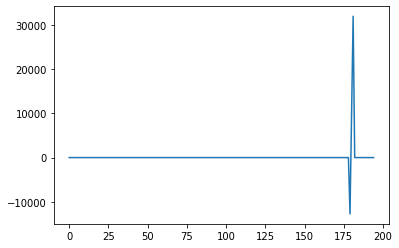

In [ ]:
plt.plot(returnsant['Factor - Value vs Growth'].values.reshape(-1,1))

In [ ]:
filtered_state_covariances

array([[[ 8.18249620e-01, -1.34176518e-01],
        [-1.34176518e-01,  4.70592673e-01]],

       [[ 2.81770951e+03,  1.54797635e+03],
        [ 1.54797635e+03,  1.06517565e+04]],

       [[ 3.26960427e+03,  2.15119209e+03],
        [ 2.15119209e+03,  1.31226255e+04]],

       [[ 3.31796204e+03,  2.21909599e+03],
        [ 2.21909599e+03,  1.34001490e+04]],

       [[ 3.32269293e+03,  2.22591085e+03],
        [ 2.22591085e+03,  1.34290349e+04]],

       [[ 3.32317034e+03,  2.22663390e+03],
        [ 2.22663390e+03,  1.34320382e+04]],

       [[ 3.32322006e+03,  2.22670955e+03],
        [ 2.22670955e+03,  1.34323382e+04]],

       [[ 3.32322511e+03,  2.22671691e+03],
        [ 2.22671691e+03,  1.34323672e+04]],

       [[ 3.32322560e+03,  2.22671761e+03],
        [ 2.22671761e+03,  1.34323701e+04]],

       [[ 3.32322565e+03,  2.22671768e+03],
        [ 2.22671768e+03,  1.34323704e+04]],

       [[ 3.32322566e+03,  2.22671768e+03],
        [ 2.22671768e+03,  1.34323704e+04]],

       [[ 